In [1]:
import yaml
import torch

from roadvision3d.src.engine.model_builder import build_model
from roadvision3d.src.engine.model_saver import load_checkpoint
from roadvision3d.tools.inference import inference, process_image
from roadvision3d.src.datasets.object_3d import Calibration
from roadvision3d.visualization import Visualizer

from PIL import Image
import numpy as np



%load_ext autoreload
%autoreload 2

In [5]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/SMOKE_KITTI_EXP.yaml'
checkpoint_path = '/home/javier/pytorch/RoadVision3D/work_dirs/SMOKE_KITTI_EXP/logs/checkpoints/checkpoint_epoch_150.pth'

cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)    
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = build_model(cfg)
load_checkpoint(model = model,
                optimizer = None,
                filename = checkpoint_path,
                map_location=device)


150

In [43]:
data_id = 21

img_path = '/home/javier/datasets/kitti/training/image_2/%06d.png' % data_id
calib_camera_path = '/home/javier/datasets/kitti/training/calib/%06d.txt' % data_id

img_tensor, coord = process_image(img_path, cfg)
calib = Calibration.from_kitti_calib_file(calib_camera_path)

In [44]:
results = inference(img_tensor, calib, model, cfg, device, coord)

In [45]:
print(results)

[0 0.000 0.000 0.000 box2d: [466.28946 207.62666 453.71054 248.37334] hwl: [1.535 1.536 2.817] pos: [-2.8893182  1.7088165 12.85787  ] ry: 1.661, 0 0.000 0.000 0.000 box2d: [592.3773  182.31607 575.6227  201.68393] hwl: [1.390 1.674 6.233] pos: [-1.441999   1.3124995 24.589008 ] ry: 1.740, 0 0.000 0.000 0.000 box2d: [578.2605  186.45166 565.7395  205.54834] hwl: [1.412 1.555 4.053] pos: [-1.6702478  1.4088526 24.064281 ] ry: 1.761]


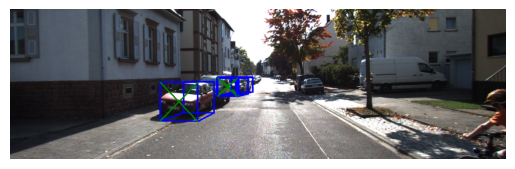

In [46]:
visualizer = Visualizer(calib=calib, pitch=0)

img_file = Image.open(img_path)

# Draw 2D bounding boxes on the image
# image_with_2d = visualizer.draw_2d_bboxes(img_file, results, color='red', width=3, display=True)

# Draw 3D bounding boxes on the image
image_with_3d = visualizer.draw_3d_bboxes(img_file, results, color='blue', color_front='green', width=4, display=True)